# qiip por Daniel Fajardo

Importar las librerias necesaria para manejo de csv(pandas), hacer graficos(matplotlib, seaborn) y hacer los modelos(sklearn)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Leer el csv y convertirlo a un pandas dataframe

In [14]:
df=pd.read_csv("dataset.csv")

Ver el encabezado y contar el numero de valores nulos en cada columna

In [15]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,target
0,-0.037972,0.029496,0.729937,-0.186288,0.006453,0.854363,NaN,1
1,0.079934,0.032222,0.198924,0.934654,0.477622,0.446009,0.966775,0
2,0.004587,0.078394,0.523415,0.638759,0.402038,0.723474,0.799224,1
3,-0.236340,0.203155,-0.497715,0.543063,0.243456,NaN,0.736928,1
4,-0.025206,0.228074,1.048510,-0.058777,0.003455,1.023968,NaN,0


In [16]:
df.isnull().sum()

x1          0
x2          0
x3          0
x4          0
x5          0
x6        402
x7        399
target      0
dtype: int64

Imprimir el numero de entradas y hacer el comparativo con los valores faltantes en las columnas...se hace necesario descartar x6 y x7

In [17]:
len(df)

799

Hacer un histograma de las columnas se observa que los x_i son valores continuos entre 0 y 1 aproximadamente

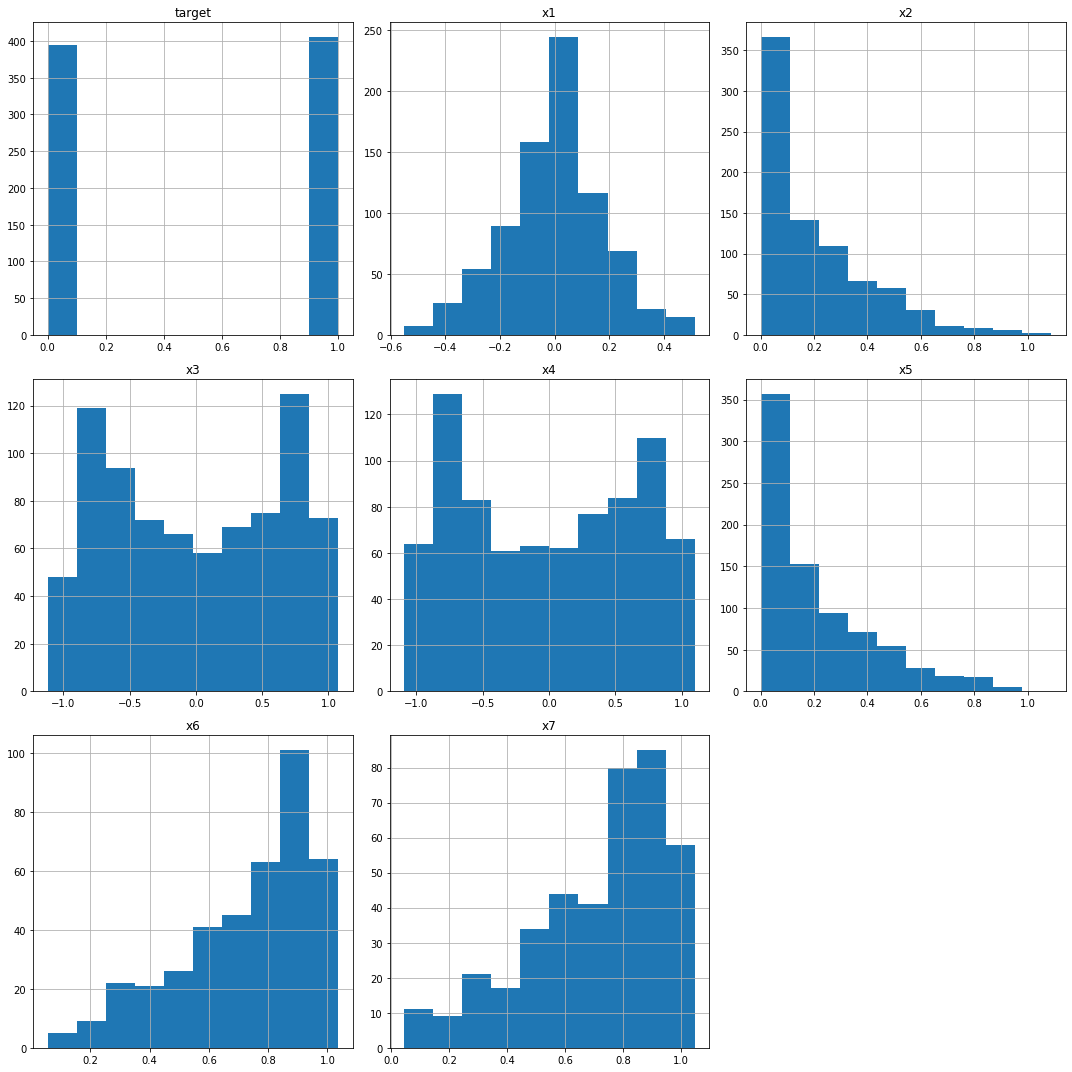

In [18]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

Se hallan las estadisticas descriptivas de todas las columnas...

In [19]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,target
count,799.000000,7.990000e+02,799.000000,799.000000,7.990000e+02,397.000000,400.000000,799.000000
mean,-0.000740,1.983355e-01,0.003664,-0.008475,2.064050e-01,0.727466,0.713992,0.506884
std,0.177227,2.059818e-01,0.640687,0.642253,2.141468e-01,0.225252,0.233337,0.500266
min,-0.551155,6.549000e-07,-1.117479,-1.093042,3.234737e-07,0.055637,0.044427,0.000000
25%,-0.097808,2.980927e-02,-0.618222,-0.643706,3.365979e-02,0.578063,0.565000,0.000000
50%,0.003469,1.257956e-01,-0.007665,0.001974,1.362955e-01,0.796143,0.790598,1.000000
75%,0.098675,3.040010e-01,0.626463,0.625046,3.204572e-01,0.898603,0.888199,1.000000
max,0.512941,1.086950e+00,1.074260,1.097388,1.086479e+00,1.036465,1.047563,1.000000


Se verifica que no existan entradas iguales duplicadas

In [20]:
df.duplicated().sum()

0

In [25]:
dff=df.drop(["x6","x7"],axis=1)

Se grafican los boxplot de las variables haciendo la comparacion cuando el target es 0 o 1, se hace con la finalidad de identificar visualmente outliers

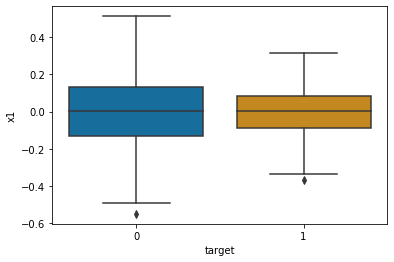

In [28]:
sns.boxplot(y="x1", x="target", data=dff, palette="colorblind")

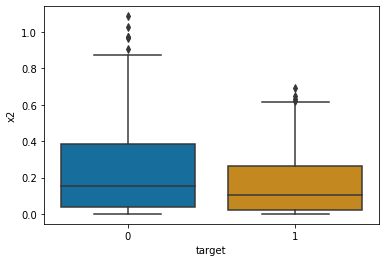

In [29]:
sns.boxplot(y="x2", x="target", data=dff, palette="colorblind")

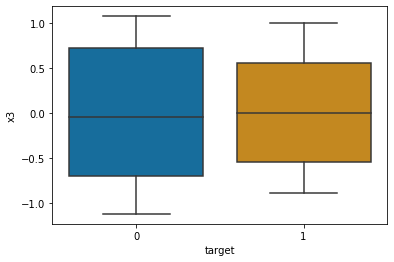

In [30]:
sns.boxplot(y="x3", x="target", data=dff, palette="colorblind")

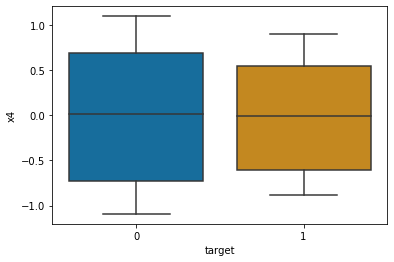

In [31]:
sns.boxplot(y="x4", x="target", data=dff, palette="colorblind")

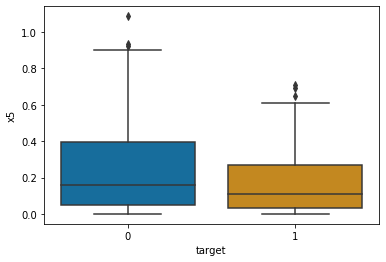

In [32]:
sns.boxplot(y="x5", x="target", data=dff, palette="colorblind")

Se halla la correlacion que entra las columnas, en caso de haber correlacion muy alta se deben eliminar columnas con el fin de evitar la multicolinealidad

In [34]:
dff.corr()

,x1,x2,x3,x4,x5,target
x1,1.000000,-0.005307,0.005657,-0.051797,0.019792,-0.001471
x2,-0.005307,1.000000,0.024280,0.000389,-0.424795,-0.179847
x3,0.005657,0.024280,1.000000,0.002399,-0.018337,0.014417
x4,-0.051797,0.000389,0.002399,1.000000,0.041928,-0.009143
x5,0.019792,-0.424795,-0.018337,0.041928,1.000000,-0.191189
target,-0.001471,-0.179847,0.014417,-0.009143,-0.191189,1.000000


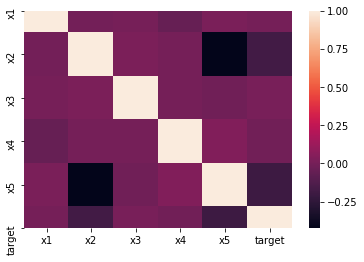

In [35]:
sns.heatmap(dff.corr())

Se eliminan outliers usando la definicion de si una entrada esta mas de 1.5xIQ alejada  de Q3 se descarta...

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
dff = dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

Se verifican cuantos valores quedan despues de eliminar outliers

In [37]:
len(dff)

719

Se define x,y y se definen los modelos que serian: Logistic Regression y Random Forest Classifier.

In [39]:
x=dff.drop("target",axis=1)
y=dff[["target"]]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
v=round(results.mean(),2)
e=round(results.std(),4)
print("Accuracy:{} ({})".format(v,e))

Accuracy:0.62 (0.0596)


/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

In [52]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
v=round(results.mean(),2)
e=round(results.std(),4)
print("Logloss:{} ({})".format(v,e))

Logloss:-0.66 (0.0297)


/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

In [54]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
v=round(results.mean(),2)
e=round(results.std(),4)
print("AUC:{} ({})".format(v,e))

AUC:0.61 (0.0851)


/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

In [64]:
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

[[20 46]
 [12 66]]
              precision    recall  f1-score   support

           0       0.62      0.30      0.41        66
           1       0.59      0.85      0.69        78

    accuracy                           0.60       144
   macro avg       0.61      0.57      0.55       144
weighted avg       0.61      0.60      0.56       144



/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(max_depth=2, random_state=42)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
v=round(results.mean(),2)
e=round(results.std(),4)
print("Accuracy:{} ({})".format(v,e))

Accuracy:0.73 (0.0411)


/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [66]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
v=round(results.mean(),2)
e=round(results.std(),4)
print("Logloss:{} ({})".format(v,e))

Logloss:-0.59 (0.0156)


/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [67]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
v=round(results.mean(),2)
e=round(results.std(),4)
print("AUC:{} ({})".format(v,e))

AUC:0.85 (0.0501)


/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [68]:
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
report = classification_report(y_test, predicted)
print(report)

[[28 38]
 [ 2 76]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.58        66
           1       0.67      0.97      0.79        78

    accuracy                           0.72       144
   macro avg       0.80      0.70      0.69       144
weighted avg       0.79      0.72      0.70       144



/home/danielfajardo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/danielfajardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Finalmente se encuentran las metricas mas populares para evaluar modelos de clasificacion...se observa que el desempeño del random forest es muy superior al de la regresion logistica...mi intuicion dic e que deberia intentar usar una modelo aun mas complejo con la intencion de ver si las metricas son aun mejores...una red neural normal podria funcionar bien.

En caso de desear una explicacion mas detallada de lo que se hizo en este notebook podemos cuadrar una videollamada o llamada normal mi numero es 3194737315